In [1]:
#importing keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, Input, SpatialDropout1D
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

Using TensorFlow backend.


In [2]:
# DataFrame
import pandas as pd
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
#numpy
import numpy as np
#utility
import re
# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# sklearn
from sklearn.model_selection import train_test_split

In [3]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [4]:
#Load Dataset
df = pd.read_csv("./sentiment_data.csv")

In [5]:
df_text_genre=df[['tweet_content','harassment', 'indirecth','physicalh','sexualh']]

In [6]:
train, test = train_test_split(df_text_genre, test_size=0.2, random_state=42, shuffle=True)

In [7]:
#Load Dataset
tf = pd.read_csv("./testset-competition.csv",)

In [8]:
print(df_text_genre)

                                          tweet_content  harassment  \
0     concurso porno japon go girl nude nylon stock ...           1   
1     ava lauren cheat deep throat syndrom porn extr...           1   
2     watch old classic movi pandora fli dutchman av...           0   
3     memesyndrom terribl trend sassi x89 co yqpungwhpj           0   
4     youwantsumfuck ava mfc thought pregnanc announ...           1   
...                                                 ...         ...   
9082  tommygrimaldi sexyarmpit happen night well eve...           0   
9083  gp homegirl travel drive weekend th x89 co jwa...           0   
9084  lfceric cheat cousin excus want prove marri ki...           0   
9085  kokomothegreat slut alway slut take girl ghett...           1   
9086  italian german porno unwant oil manga x89 czec...           1   

      indirecth  physicalh  sexualh  
0             0          0        1  
1             0          0        1  
2             0          0       

In [9]:
tokenizer = Tokenizer(num_words=None, split=' ')
tokenizer.fit_on_texts(train['tweet_content'].values)
x = tokenizer.texts_to_sequences(train['tweet_content'].values)
x = pad_sequences(x, maxlen=20, padding='post')
print(x[54])

[  63 3721 3722  179    8    5  102  166   33 1646   99   33   33  927
   98 2858    0    0    0    0]


In [10]:
y = tokenizer.texts_to_sequences(test['tweet_content'].values)
y = pad_sequences(y, maxlen=20, padding='post')
print(y[3])

[10591 10590    38  1678  1213  1322    32   504   179   198     2   595
     5    79     0     0     0     0     0     0]


In [11]:
from sklearn.model_selection import train_test_split
x_test = train.iloc[:,1:].values
y_test=test.iloc[:,1:].values

In [12]:
print(x_test)

[[1 0 0 1]
 [1 0 0 1]
 [0 0 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 1]]


In [13]:
batch_size =128
epochs = 10

In [14]:
model = Sequential()
model.add(Embedding(14645, 256))
model.add(Dropout(0.4))
model.add(LSTM(32, dropout=0.4, recurrent_dropout=0.1))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 256)         3749120   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                36992     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 3,786,244
Trainable params: 3,786,244
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [16]:
history=model.fit(x, x_test,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(y, y_test))

C:\Users\Admin\anaconda3\envs\math_env\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 7269 samples, validate on 1818 samples
Epoch 1/10
7269/7269 [==============================] - 6s 837us/step - loss: 0.4585 - accuracy: 0.7801 - val_loss: 0.3625 - val_accuracy: 0.7950
Epoch 2/10
7269/7269 [==============================] - 4s 526us/step - loss: 0.2522 - accuracy: 0.9152 - val_loss: 0.2022 - val_accuracy: 0.9373
Epoch 3/10
7269/7269 [==============================] - 4s 527us/step - loss: 0.1710 - accuracy: 0.9512 - val_loss: 0.1841 - val_accuracy: 0.9424
Epoch 4/10
7269/7269 [==============================] - 4s 519us/step - loss: 0.1411 - accuracy: 0.9619 - val_loss: 0.1818 - val_accuracy: 0.9450
Epoch 5/10
7269/7269 [==============================] - 4s 486us/step - loss: 0.1166 - accuracy: 0.9686 - val_loss: 0.1794 - val_accuracy: 0.9438
Epoch 6/10
7269/7269 [==============================] - 4s 486us/step - loss: 0.0999 - accuracy: 0.9738 - val_loss: 0.1775 - val_accuracy: 0.9451
Epoch 7/10
7269/7269 [==============================] - 4s 488us/step - loss

In [17]:
print(history.history)

{'val_loss': [0.3625054960728216, 0.20224404631733764, 0.18409789228203274, 0.18184298285097703, 0.17944599727396132, 0.17749091000905787, 0.1769899143801533, 0.18244619382293312, 0.18768846816552354, 0.186254950197223], 'val_accuracy': [0.794966995716095, 0.9372937083244324, 0.942381739616394, 0.9449945092201233, 0.9437568783760071, 0.9451320171356201, 0.94664466381073, 0.9485698342323303, 0.9443069100379944, 0.9436193704605103], 'loss': [0.45849845736238976, 0.2521936287515379, 0.17096106245783735, 0.1411409566525105, 0.1165862800746906, 0.09986314342637423, 0.08572675628221942, 0.07616948160578746, 0.06592576755837276, 0.05552767225282239], 'accuracy': [0.78009355, 0.91522217, 0.95119685, 0.9618586, 0.96863395, 0.9737584, 0.9771633, 0.9792268, 0.9821158, 0.9836291]}


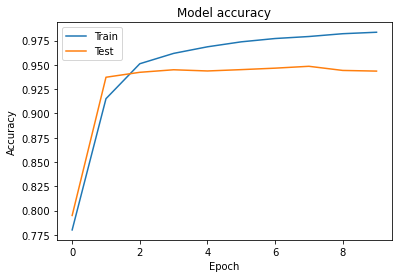

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

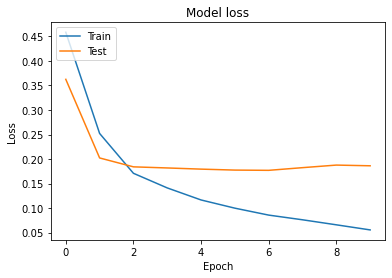

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
score= model.evaluate(y, y_test, verbose = 2)
print("Loss: %.2f" % score[0])
print("Accuracy: %.2f" % score[1])

Loss: 0.19
Accuracy: 0.94


In [21]:
prediction = model.predict(x)

In [22]:
print('Prediction value:', prediction[374])

Prediction value: [0.99492705 0.00333451 0.00561992 0.99062073]


In [23]:
z = tokenizer.texts_to_sequences(tf['tweet_content'].values)
z = pad_sequences(z, maxlen=22, padding='post')

In [24]:
pred=model.predict(z)
print('Prediction value:', pred[420])

Prediction value: [0.5539359  0.25558516 0.3437753  0.0916627 ]


In [25]:
for i in range(len(pred)):
    tf.at[i,'Harassment']=int(0)
    tf.at[i,'IndirectH']=int(0)
    tf.at[i,'PhysicalH']=int(0)
    tf.at[i,'SexualH']=int(0)
    if pred[i,0]>=0.4:
        tf.at[i,'Harassment']=1
        t=np.argmax(pred[i,1:])
        if t==2:
            tf.at[i,'SexualH']=int(1)
        elif t==1:
            tf.at[i,'PhysicalH']=int(1)
        elif t==0:
            tf.at[i,'IndirectH']=int(1)

In [26]:
tf[420:431]

,tweet_content,Harassment,IndirectH,PhysicalH,SexualH
420,naked girls fingering eachother beautiful girl...,1.0,0.0,1.0,0.0
421,naked girls vigina sexy swedish men pics,1.0,0.0,1.0,0.0
422,naked pillow fights nude girls in the farm,0.0,0.0,0.0,0.0
423,nanuqsaurus was a tyrannosaur from the late cr...,0.0,0.0,0.0,0.0
424,nasa commanded voyager to fire its thrusters f...,1.0,0.0,1.0,0.0
425,nature at its best in troms norway by tommy si...,0.0,0.0,0.0,0.0
426,nawww im the last person to criticize other pp...,0.0,0.0,0.0,0.0
427,nba young boy has a shitty ass personality his...,1.0,0.0,1.0,0.0
428,nba youngboy beat his gf ass blacked her eye a...,1.0,0.0,0.0,1.0
429,need a bitch who know algebra,1.0,0.0,0.0,1.0


In [27]:
model.save('./model.h5')

In [28]:
tf.to_csv('./testset-competition-result.csv')

In [29]:
from keras.utils import plot_model

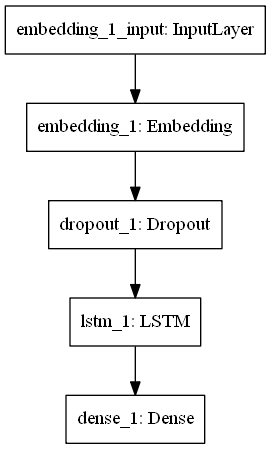

In [30]:
plot_model(model, to_file='model.png')